<a href="https://colab.research.google.com/github/Noha-Magdy/Agglomerative-Hierarchical-Clustering/blob/main/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agglomerative Hierarchical Clustering**




---


### Steps:
1.   Preparing the data

2.   Computing (dis)similarity information between every pair of objects in the data set.

1.   Using linkage function to group objects into hierarchical cluster tree, based on the distance information generated at step 1. Objects/clusters that are in close proximity are linked together using the linkage function.
2.   Determining where to cut the hierarchical tree into clusters. This creates a partition of the data.


###  **My opinion regarding each approach and which one I recommend**

After testing different linkage approaches on the data, the results showed that using the single(min) approach gave the worst results as all the data points belonged to only one cluster except 3 individual points for the other 4 clusters 

---------------------

The average approach gave 3 good clusters leaving only few points to the last cluster 

--------------------

the complete(max), which I recommend, gave the best results dividing the data into 4 clusters 

------------------------

The result of the max approach is very similar to the KMeans clustring results

### Needed libraries 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import linkage, dendrogram





### 1) Preparing the data



In [209]:
# loding the data
data = pd.read_csv("s.csv")
data.columns


Index(['x1', 'x2'], dtype='object')

In [210]:
data.head()

,x1,x2
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


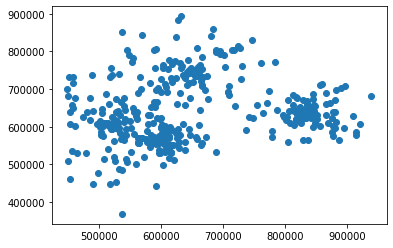

In [262]:
plt.scatter(x=data["x1"], y=data_t["x2"])

### 2) Computing (dis)similarity 

In [62]:
def Euclidean_Distance(x,y):
  """
  funcion to calculate distance between 2 data points

  Paramerts:
    x,y -- 2 points of data

  Return: 
    dist -- the distance between points 
  """

  dist = np.round(np.linalg.norm(x - y),2)
  return dist


In [ ]:
#test
d= Euclidean_Distance(data.iloc[1],data.iloc[2])
d

70884.79

In [ ]:
# distance matrix 

def distance_matrix (x,y):
  """
  function to generate distance matrix 

  Parameters: 
    x,y -- two sets of points 

  Return:
    Result -- pandas dataframe of the distance matrix
  """
  x = np.asarray(x)
  m, k = x.shape
  y = np.asarray(y)
  n, kk = y.shape

  result = np.empty((m,n),dtype=float)  

  for i in range(m):
    for j in range(n):
      result[i,j] = Euclidean_Distance(x[i],y[j])

  return result



In [ ]:
#test
distances = pd.DataFrame(distance_matrix(data.values, data.values), index = data.index, columns = data.index)
distances

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,0.00,7218.65,71357.48,45561.74,63803.56,76348.46,82281.51,64003.23,97738.68,63953.58,93868.75,66538.89,43249.09,58583.72,65509.41,22214.45,55494.02,68599.39,56197.90,82025.42,74540.18,66378.48,35176.97,52691.72,66859.27,70477.41,103340.41,60356.97,61843.77,97260.45,61278.45,78316.74,38580.25,115670.26,42311.81,53498.33,69381.54,80018.28,60128.02,50290.72,...,185495.18,183972.95,181720.83,163850.57,163191.11,308432.37,160755.22,123626.30,239226.16,184447.74,189244.15,270865.76,186389.25,193363.01,145527.98,333774.64,209683.97,183953.16,203238.96,242938.66,180201.79,154130.80,175686.35,165865.42,161326.14,326943.63,258848.27,117888.31,222177.27,306625.64,217736.14,188969.20,171195.88,344205.65,211213.83,185786.43,256198.54,266161.59,214877.24,252361.78
1,7218.65,0.00,70884.79,47692.63,58458.79,77745.91,84652.80,63382.65,101851.48,63329.39,92956.04,65994.86,41379.01,62227.93,64919.48,15073.92,55081.38,68060.27,52246.17,78988.67,74819.86,66063.63,36127.27,45815.22,68305.04,69191.03,103911.54,60983.28,61074.88,97789.79,66661.62,78215.94,40849.71,120395.85,41318.63,55533.41,69457.08,77377.80,61748.08,52518.36,...,178511.45,177063.87,175038.27,156640.06,157728.32,301325.87,153717.79,116489.60,232126.89,181109.48,182588.18,263648.00,180405.91,186372.42,138438.55,326990.48,203345.59,178498.91,196207.23,235745.86,173161.83,148508.33,172028.35,159894.54,154631.65,321160.33,251632.72,110897.68,215510.56,300484.08,211754.86,182241.08,164179.94,337385.76,204004.09,179471.06,250615.35,258942.99,208646.96,245192.47
2,71357.48,70884.79,0.00,32241.91,50401.68,20112.73,33030.46,7566.28,62505.37,7623.05,22864.40,4908.30,30808.53,39876.24,6018.04,74841.37,15868.24,2868.08,35801.61,29285.06,8390.76,5131.81,36920.47,70104.11,18804.80,8106.68,34821.48,14476.75,10051.95,28846.63,59531.87,8122.20,37481.98,83946.50,29634.35,27390.94,5603.80,24237.93,21693.69,30159.35,...,173212.23,169144.39,160511.98,174103.04,121618.14,295994.11,152900.38,125687.28,253928.29,121192.18,166770.73,270897.50,150727.78,180750.99,141828.06,308711.01,178869.61,140649.47,191628.99,239248.66,170643.19,115718.64,114889.30,131695.42,142339.85,283096.41,258369.63,145395.57,197883.77,268646.00,180164.09,168374.80,161410.29,319927.39,211549.81,156110.26,211334.49,267724.20,181724.58,246003.77
3,45561.74,47692.63,32241.91,0.00,59123.84,31112.28,36960.48,26997.50,57154.65,26979.14,54545.16,28581.48,25000.51,18390.40,28000.59,57058.00,20003.85,30236.75,43455.45,55531.51,32022.57,27308.67,12959.12,67461.16,21703.80,35678.59,59085.41,18045.87,26223.79,53192.81,33991.56,36884.26,6988.38,77698.84,19770.17,7938.10,28111.95,51353.68,14863.88,4838.39,...,189851.14,186706.87,180372.46,181447.33,148092.51,314038.71,167318.20,135061.12,260532.15,153276.21,187223.90,283849.32,175684.73,197654.75,154222.16,331410.61,202537.57,168004.36,208316.50,253405.18,186149.09,140964.91,146604.21,155779.97,160941.57,311589.54,271418.12,144323.71,219458.98,295371.28,206139.43,188146.09,176812.44,342408.76,223730.76,179037.45,239791.75,280022.95,206237.29,261293.55
4,63803.56,58458.79,50401.68,59123.84,0.00,69360.06,81896.56,45628.04,110021.52,45577.68,61473.77,47377.52,34301.49,76556.06,46527.48,51275.16,44387.84,48405.98,16150.33,33916.52,58672.55,49220.15,50297.79,26126.79,63931.19,42884.91,82033.28,54092.48,43570.23,76831.99,92979.21,57719.97,57852.41,131658.04,39509.72,61651.92,54000.44,36124.91,61702.48,61615.57,...,130914.58,128011.74,122748.59,124677.13,99387.56,255187.21,108194.43,76946.51,204435.58,127220.82,129898.42,224992.52,123229.98,138751.09,95256.03,274798.44,147835.34,120150.06,149346.24,194337.19,127061.01,90394.49,116959.37,102730.46,102844.88,263298.90,212529.73,95534.07,162609.31,243739.05,154510.94,130394.15,117727.0

In [ ]:
# compare with scipy function 

## Worked correctly :)

pd.DataFrame(np.round(distance_matrix(data.values, data.values), 2), index = data.index, columns = data.index).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,0.00,7218.65,71357.48,45561.74,63803.56,76348.46,82281.51,64003.23,97738.68,63953.58,93868.75,66538.89,43249.09,58583.72,65509.41,22214.45,55494.02,68599.39,56197.90,82025.42,74540.18,66378.48,35176.97,52691.72,66859.27,70477.41,103340.41,60356.97,61843.77,97260.45,61278.45,78316.74,38580.25,115670.26,42311.81,53498.33,69381.54,80018.28,60128.02,50290.72,...,185495.18,183972.95,181720.83,163850.57,163191.11,308432.37,160755.22,123626.30,239226.16,184447.74,189244.15,270865.76,186389.25,193363.01,145527.98,333774.64,209683.97,183953.16,203238.96,242938.66,180201.79,154130.80,175686.35,165865.42,161326.14,326943.63,258848.27,117888.31,222177.27,306625.64,217736.14,188969.20,171195.88,344205.65,211213.83,185786.43,256198.54,266161.59,214877.24,252361.78
1,7218.65,0.00,70884.79,47692.63,58458.79,77745.91,84652.80,63382.65,101851.48,63329.39,92956.04,65994.86,41379.01,62227.93,64919.48,15073.92,55081.38,68060.27,52246.17,78988.67,74819.86,66063.63,36127.27,45815.22,68305.04,69191.03,103911.54,60983.28,61074.88,97789.79,66661.62,78215.94,40849.71,120395.85,41318.63,55533.41,69457.08,77377.80,61748.08,52518.36,...,178511.45,177063.87,175038.27,156640.06,157728.32,301325.87,153717.79,116489.60,232126.89,181109.48,182588.18,263648.00,180405.91,186372.42,138438.55,326990.48,203345.59,178498.91,196207.23,235745.86,173161.83,148508.33,172028.35,159894.54,154631.65,321160.33,251632.72,110897.68,215510.56,300484.08,211754.86,182241.08,164179.94,337385.76,204004.09,179471.06,250615.35,258942.99,208646.96,245192.47
2,71357.48,70884.79,0.00,32241.91,50401.68,20112.73,33030.46,7566.28,62505.37,7623.05,22864.40,4908.30,30808.53,39876.24,6018.04,74841.37,15868.24,2868.08,35801.61,29285.06,8390.76,5131.81,36920.47,70104.11,18804.80,8106.68,34821.48,14476.75,10051.95,28846.63,59531.87,8122.20,37481.98,83946.50,29634.35,27390.94,5603.80,24237.93,21693.69,30159.35,...,173212.23,169144.39,160511.98,174103.04,121618.14,295994.11,152900.38,125687.28,253928.29,121192.18,166770.73,270897.50,150727.78,180750.99,141828.06,308711.01,178869.61,140649.47,191628.99,239248.66,170643.19,115718.64,114889.30,131695.42,142339.85,283096.41,258369.63,145395.57,197883.77,268646.00,180164.09,168374.80,161410.29,319927.39,211549.81,156110.26,211334.49,267724.20,181724.58,246003.77
3,45561.74,47692.63,32241.91,0.00,59123.84,31112.28,36960.48,26997.50,57154.65,26979.14,54545.16,28581.48,25000.51,18390.40,28000.59,57058.00,20003.85,30236.75,43455.45,55531.51,32022.57,27308.67,12959.12,67461.16,21703.80,35678.59,59085.41,18045.87,26223.79,53192.81,33991.56,36884.26,6988.38,77698.84,19770.17,7938.10,28111.95,51353.68,14863.88,4838.39,...,189851.14,186706.87,180372.46,181447.33,148092.51,314038.71,167318.20,135061.12,260532.15,153276.21,187223.90,283849.32,175684.73,197654.75,154222.16,331410.61,202537.57,168004.36,208316.50,253405.18,186149.09,140964.91,146604.21,155779.97,160941.57,311589.54,271418.12,144323.71,219458.98,295371.28,206139.43,188146.09,176812.44,342408.76,223730.76,179037.45,239791.75,280022.95,206237.29,261293.55
4,63803.56,58458.79,50401.68,59123.84,0.00,69360.06,81896.56,45628.04,110021.52,45577.68,61473.77,47377.52,34301.49,76556.06,46527.48,51275.16,44387.84,48405.98,16150.33,33916.52,58672.55,49220.15,50297.79,26126.79,63931.19,42884.91,82033.28,54092.48,43570.23,76831.99,92979.21,57719.97,57852.41,131658.04,39509.72,61651.92,54000.44,36124.91,61702.48,61615.57,...,130914.58,128011.74,122748.59,124677.13,99387.56,255187.21,108194.43,76946.51,204435.58,127220.82,129898.42,224992.52,123229.98,138751.09,95256.03,274798.44,147835.34,120150.06,149346.24,194337.19,127061.01,90394.49,116959.37,102730.46,102844.88,263298.90,212529.73,95534.07,162609.31,243739.05,154510.94,130394.15,117727.0

In [70]:
def distances_dict(cluster1, cluster2):
  """
  function that creates a dictinary of all the distances between the points

  Parameters: 
    cluster1, cluster2 -- two sets of data points

  Return:
    dist -- dictinary of distances where its keys are the distances and values are the 2 points or clusters  {222,3 : [[1],[3]]}

  """
  dist = {}
  cluster1 = np.asarray(cluster1)
  m, k = cluster1.shape
  cluster2 = np.asarray(cluster2)
  n, kk = cluster2.shape

  for i in range(m):
    for j in range(n):
      if Euclidean_Distance(cluster1[i],cluster2[j]) != 0.0:
        dist[(tuple([i]), tuple([j]))] = Euclidean_Distance(cluster1[i],cluster2[j])
   
  return dist

### 3) Using linkage function to group objects into hierarchical cluster tree

In [165]:
def min_linkage(cluster1, cluster2):
  """
  function to create distance between two clusters based on min approach 

  Parameters:
    cluster1, cluster2 -- two different clusters 

  Returns:
    min_dist -- distance between two clusters 
  """
  dist = {}
  cluster1 = np.asarray(cluster1)
  m, k = cluster1.shape
  cluster2 = np.asarray(cluster2)
  n, kk = cluster2.shape

  for i in range(m):
    for j in range(n):
      # if Euclidean_Distance(cluster1[i],cluster2[j]) != 0.0:     # to not take zero as min 
      dist[Euclidean_Distance(cluster1[i],cluster2[j])] = [i,j]
  
  min_dist = min(dist.keys())
   
  return min_dist


def max_linkage(cluster1, cluster2):
  """
  function to create distance between two clusters based on max approach 

  Parameters:
    cluster1, cluster2 -- two different clusters 

  Returns:
    max_dist -- distance between two clusters 
  """
  dist = {}
  cluster1 = np.asarray(cluster1)
  m, k = cluster1.shape
  cluster2 = np.asarray(cluster2)
  n, kk = cluster2.shape

  for i in range(m):
    for j in range(n):
      # if Euclidean_Distance(cluster1[i],cluster2[j]) != 0.0:  
      dist[Euclidean_Distance(cluster1[i],cluster2[j])] = [i,j]
  
  max_dist = max(dist.keys())
   
  return max_dist
  


def avr_linkage(cluster1, cluster2):
  """
  function to create distance between two clusters based on avarage approach 

  Parameters:
    cluster1, cluster2 -- two different clusters 

  Returns:
    avr_dist -- distance between two clusters 
  """
  dist = {}
  cluster1 = np.asarray(cluster1)
  m, k = cluster1.shape
  cluster2 = np.asarray(cluster2)
  n, kk = cluster2.shape

  for i in range(m):
    for j in range(n):
      # if Euclidean_Distance(cluster1[i],cluster2[j]) != 0.0:
      dist[Euclidean_Distance(cluster1[i],cluster2[j])] = [i,j]
        
  avr_dist = np.mean(np.array(list(dist.keys()), dtype="float64"))
   
  return avr_dist


In [213]:
#test
c1= data.iloc[:4]
c2= data.iloc[[5]]

x= max_linkage(c1,c2)
x

77745.91

In [214]:
#test
c1= data.iloc[:4]
c2= data.iloc[:5]

x= min_linkage(c1,c2)
x

0.0

In [215]:
#test
c1= data.iloc[:4]
c2= data.iloc[:5]

x= avr_linkage(c1,c2)
x

46067.733636363635

In [60]:
def to_cluster(data):
  """
  convert each data set point to cluster to start the hierarchy with 400 cluster

  Returns:
  clusters -- dictinary contains the step number as a key 
              and the clusters as a value to track all the changes after updating the dictinary 
  """
  clusters = {}
  clusters_list = []
  for i in data.index.to_list():
    clusters_list.append(tuple([i]))

  clusters["step1"]= clusters_list
  return clusters


In [247]:
def update_distance_dict(distances, new_cluster, old_clusters ,linkege = "min"):
  """
  when new cluster is added it calculate the distances between it and the other old clusters
  and add the new distances to the old distances dict

  Parameters: 
    distances -- old distances dict
    new_cluster -- the cluster to calculate distance between it and the old ones
    old_clusters -- the old clusters before new linkage 
    linkege -- linkage method ("min", "max", "avr")

  Returns: 
    updated distances dict
  """
  
  # distances.pop(old_min)

  # temp_dict={}
  for i in old_clusters:
    if linkege == "min":
      d = min_linkage(data.iloc[list(new_cluster)], data.iloc[list(i)])
      distances[(new_cluster, i)]= d
    if linkege == "max":
      d = max_linkage(data.iloc[list(new_cluster)], data.iloc[list(i)])
      distances[(new_cluster, i)]= d
    if linkege == "avr":
      d = avr_linkage(data.iloc[list(new_cluster)], data.iloc[list(i)])
      distances[(new_cluster, i)]= d

  # distances = {**distances, **temp_dict} # concatinate the two dicts 

  return distances


In [ ]:
def if_equal(l1, l2):
  """
  function to see if two lists are equal
  It will be needed as a helper function 
  """
  l1.sort()
  l2.sort()
  res = 0
  if len(l1)!=len(l2):
    return 0
  for i in range(len(l1)):
    if l1[i] != l2[i]:
      res+=1

  if res >0:
    return 0
  else:
    return 1

# x= [3,2,5]
# y= [3,2]

# z= if_equal(x,y)
# z

In [253]:
# clusters = to_cluster(data_try)

# distances = distances_dict(data_try.values, data_try.values)


def update_clusters(clusters, distances, i, linkege = "min"):
  """
  function to merge the closest clusters together and update the cluster dict returned from to_cluster() function 

  Parameters: 
    clusters -- clusters dict
    distances -- distances dict
    i -- index to be used when updating all the clusters 
    linkege -- linkage method ("min", "max", "avr")

  Returns: 
    clusters -- updated clusters dict 
    new_distances -- updated distances dict 
  """
  print("cluster "+ str(i)+ " merged")
  clust = clusters["step"+str(i-1)].copy()
  dist = {}
  if i == 2:
    c= min([i for i in distances.values() if i > 0]) # minmum distance in all distances calculated for all data points
    dist = dict(zip(distances.values(), distances.keys()))
  else: 
    for t in clust:
      for tt in clust:
        if (t,tt) in distances.keys():
          dist[distances[(t,tt)]]= (t,tt)
        else: 
          if linkege == "min":
            d = min_linkage(data.iloc[list(t)], data.iloc[list(tt)])
            if d != 0.0:
              dist[d]= (t,tt)
          elif linkege == "max":
            d = max_linkage(data.iloc[list(t)], data.iloc[list(tt)])
            if t != tt:
              dist[d]= (t,tt)
          else: 
            d = avr_linkage(data.iloc[list(t)], data.iloc[list(tt)])
            if  t != tt:
              dist[d]= (t,tt)
  
    c= min([i for i in dist.keys() if i > 0])


  cl = clust.copy()
  for j in cl:
    for z in list(dist[c]):
      if if_equal(list(j),list(z)):
        clust.remove(j)
 
  new_cluster = []
  for n in list(dist[c]):
    for m in n:
      new_cluster.append(m)
  
  new_cluster = tuple(new_cluster)
  
  
  new_distances = update_distance_dict(distances,new_cluster, clust,linkege = linkege)

  clust.append(new_cluster)
  
  clusters["step"+str(i)] = clust


  return clusters , new_distances




In [ ]:

# x= 6

# y=[[2,3],[4,5],[6,7]]
# for i in range(len(y)):
#   if x in y[i]:
#       print(x)
#       print(i)
  

In [129]:
def create_all_cluster(data, linkege = "min"):
  """
  function that generate one big cluster keeping the hustory of all the previous leafs 

  Parameters: 
    data -- the dataset to be clustered 
    linkege -- linkage method ("min", "max", "avr")

  Returns: 
    clusters -- complete clusters dict where last value is a one cluster
                and all the previous steps are kept in the previous values

  """

  clusters = to_cluster(data) # each data point is a cluster  
  distances = distances_dict(data.values, data.values) # distances between each data point and the other 
  i= 2
  while len(clusters["step"+str(len(clusters.keys()))])> 1:  # ends when forming one cluster contains all the data
    c,d = update_clusters(clusters, distances, i, linkege = linkege ) # merge each similar clusters together keeping the history 
    clusters = c
    distances = d 
    i+=1

  return clusters


In [256]:
#test
d = data.head(10)
all = create_all_cluster(d, linkege = "avr")
all

cluster 2 merged
cluster 3 merged
cluster 4 merged
cluster 5 merged
cluster 6 merged
cluster 7 merged
cluster 8 merged
cluster 9 merged
cluster 10 merged


{'step1': [(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,)],
 'step10': [(9, 7, 2, 3, 6, 5, 8, 1, 0, 4)],
 'step2': [(0,), (1,), (2,), (3,), (4,), (5,), (6,), (8,), (9, 7)],
 'step3': [(2,), (3,), (4,), (5,), (6,), (8,), (9, 7), (1, 0)],
 'step4': [(3,), (4,), (5,), (6,), (8,), (1, 0), (9, 7, 2)],
 'step5': [(3,), (4,), (8,), (1, 0), (9, 7, 2), (6, 5)],
 'step6': [(4,), (8,), (1, 0), (6, 5), (9, 7, 2, 3)],
 'step7': [(4,), (8,), (1, 0), (9, 7, 2, 3, 6, 5)],
 'step8': [(4,), (1, 0), (9, 7, 2, 3, 6, 5, 8)],
 'step9': [(9, 7, 2, 3, 6, 5, 8), (1, 0, 4)]}

### 4) Determining where to cut the hierarchical tree into clusters

In [187]:
def Agglomerative_clustering(data, n_clusters, linkege = "min"):
  """
  function similar to sklearn.cluster.AgglomerativeClustering.fit_predict()

  Parameters: 
    data -- the dataset
    n_clusters -- number of needed clusters
    linkege -- linkage method ("min", "max", "avr")

  Returns:
  mask -- list of the cluster number for each data point
  """
  clusters = create_all_cluster(data, linkege = linkege)
  for i in clusters.keys():
    if len(clusters[i]) == n_clusters:
      wanted_clusters = clusters[i]
      

  mask = []
  for j in  data.index.to_list():
    for n in range(len(wanted_clusters)):
      if j in wanted_clusters[n]:
        mask.append(n)

  return mask



### Genarate and plot clusters

cluster 2 merged
cluster 3 merged
cluster 4 merged
cluster 5 merged
cluster 6 merged
cluster 7 merged
cluster 8 merged
cluster 9 merged
cluster 10 merged
cluster 11 merged
cluster 12 merged
cluster 13 merged
cluster 14 merged
cluster 15 merged
cluster 16 merged
cluster 17 merged
cluster 18 merged
cluster 19 merged
cluster 20 merged
cluster 21 merged
cluster 22 merged
cluster 23 merged
cluster 24 merged
cluster 25 merged
cluster 26 merged
cluster 27 merged
cluster 28 merged
cluster 29 merged
cluster 30 merged
cluster 31 merged
cluster 32 merged
cluster 33 merged
cluster 34 merged
cluster 35 merged
cluster 36 merged
cluster 37 merged
cluster 38 merged
cluster 39 merged
cluster 40 merged
cluster 41 merged
cluster 42 merged
cluster 43 merged
cluster 44 merged
cluster 45 merged
cluster 46 merged
cluster 47 merged
cluster 48 merged
cluster 49 merged
cluster 50 merged
cluster 51 merged
cluster 52 merged
cluster 53 merged
cluster 54 merged
cluster 55 merged
cluster 56 merged
cluster 57 merged


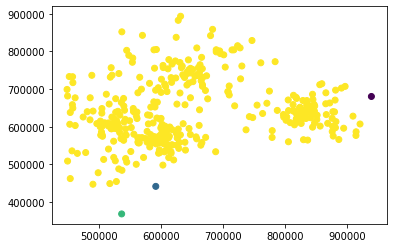

In [260]:
# min linkage approach

data_t = data.copy()
x = Agglomerative_clustering(data_t, 4, linkege = "min")

data_t["cluster"]=x

plt.scatter(x=data_t["x1"], y=data_t["x2"], c=data_t["cluster"])


## Graph is at the end of the printing Don't miss it :)))

cluster 2 merged
cluster 3 merged
cluster 4 merged
cluster 5 merged
cluster 6 merged
cluster 7 merged
cluster 8 merged
cluster 9 merged
cluster 10 merged
cluster 11 merged
cluster 12 merged
cluster 13 merged
cluster 14 merged
cluster 15 merged
cluster 16 merged
cluster 17 merged
cluster 18 merged
cluster 19 merged
cluster 20 merged
cluster 21 merged
cluster 22 merged
cluster 23 merged
cluster 24 merged
cluster 25 merged
cluster 26 merged
cluster 27 merged
cluster 28 merged
cluster 29 merged
cluster 30 merged
cluster 31 merged
cluster 32 merged
cluster 33 merged
cluster 34 merged
cluster 35 merged
cluster 36 merged
cluster 37 merged
cluster 38 merged
cluster 39 merged
cluster 40 merged
cluster 41 merged
cluster 42 merged
cluster 43 merged
cluster 44 merged
cluster 45 merged
cluster 46 merged
cluster 47 merged
cluster 48 merged
cluster 49 merged
cluster 50 merged
cluster 51 merged
cluster 52 merged
cluster 53 merged
cluster 54 merged
cluster 55 merged
cluster 56 merged
cluster 57 merged


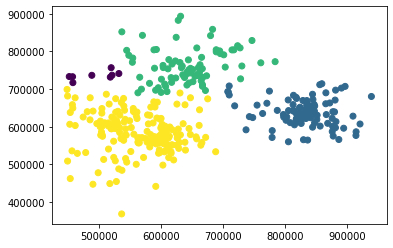

In [261]:
data_t = data.copy()
x = Agglomerative_clustering(data_t, 4, linkege = "avr")

data_t["cluster"]=x

plt.scatter(x=data_t["x1"], y=data_t["x2"], c=data_t["cluster"])

## Graph is at the end of the printing Don't miss it :)))

cluster 2 merged
cluster 3 merged
cluster 4 merged
cluster 5 merged
cluster 6 merged
cluster 7 merged
cluster 8 merged
cluster 9 merged
cluster 10 merged
cluster 11 merged
cluster 12 merged
cluster 13 merged
cluster 14 merged
cluster 15 merged
cluster 16 merged
cluster 17 merged
cluster 18 merged
cluster 19 merged
cluster 20 merged
cluster 21 merged
cluster 22 merged
cluster 23 merged
cluster 24 merged
cluster 25 merged
cluster 26 merged
cluster 27 merged
cluster 28 merged
cluster 29 merged
cluster 30 merged
cluster 31 merged
cluster 32 merged
cluster 33 merged
cluster 34 merged
cluster 35 merged
cluster 36 merged
cluster 37 merged
cluster 38 merged
cluster 39 merged
cluster 40 merged
cluster 41 merged
cluster 42 merged
cluster 43 merged
cluster 44 merged
cluster 45 merged
cluster 46 merged
cluster 47 merged
cluster 48 merged
cluster 49 merged
cluster 50 merged
cluster 51 merged
cluster 52 merged
cluster 53 merged
cluster 54 merged
cluster 55 merged
cluster 56 merged
cluster 57 merged


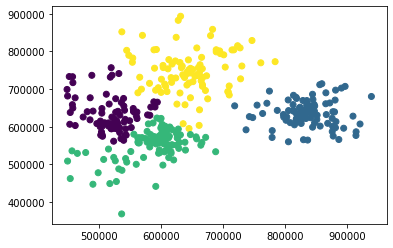

In [264]:
data_t = data.copy()
x = Agglomerative_clustering(data_t, 4, linkege = "max")

data_t["cluster"]=x

plt.scatter(x=data_t["x1"], y=data_t["x2"], c=data_t["cluster"])

## Graph is at the end of the printing Don't miss it :)))

## Comparing the results with built in functions 

### Dendrogram for the data

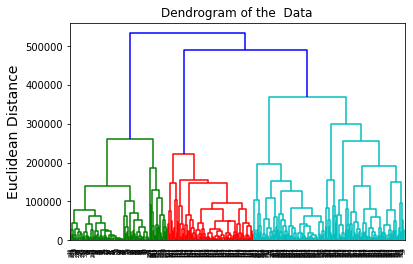

In [ ]:

den = dendrogram(linkage(data, method='complete'), 
labels = data.index)
plt.ylabel('Euclidean Distance', fontsize = 14)
plt.title('Dendrogram of the  Data')
plt.show()

### Agglomerative Clustering

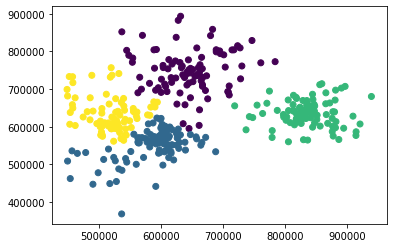

In [ ]:
# max approach

data_alg = data.copy()
aglo = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
x= aglo.fit_predict(data_alg)
data["algo"]=x 
plt.scatter(x=data["x1"], y=data["x2"], c=data["algo"])

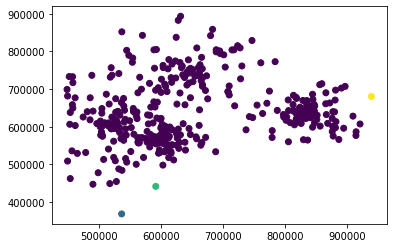

In [ ]:
# min approach

aglo = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
x= aglo.fit_predict(data_alg)
data["algo"]=x 
plt.scatter(x=data["x1"], y=data["x2"], c=data["algo"])

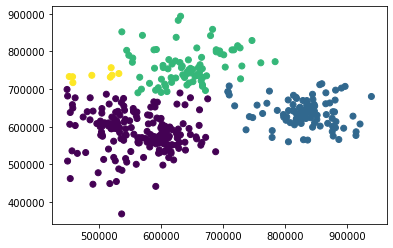

In [ ]:
# average approach

aglo = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
x= aglo.fit_predict(data_alg)
data["algo"]=x 
plt.scatter(x=data["x1"], y=data["x2"], c=data["algo"])

### KMeans clustring

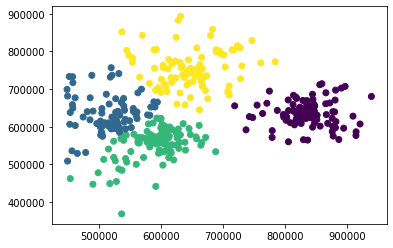

In [ ]:
data_k = data.copy()

kmeans = KMeans(n_clusters=4, random_state=0).fit(data_k)
data_k["kmeans"] = kmeans.labels_

plt.scatter(x=data["x1"], y=data["x2"], c=data_k["kmeans"])